# Regression Using Linear Neural Network


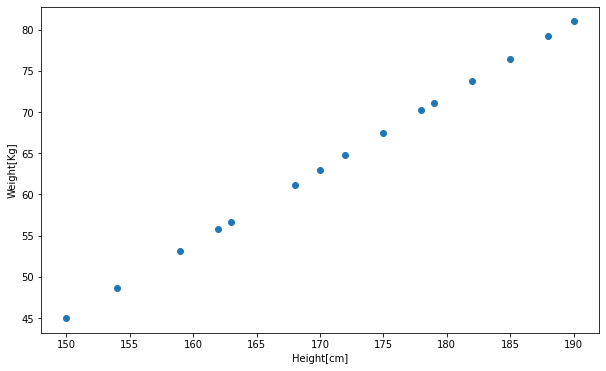

In [32]:
import matplotlib.pyplot as plt
import numpy as np
import torch
from torch import nn

heights = np.array([150, 154, 159, 162, 163, 168, 170, 172, 175, 178, 179, 182, 185, 188, 190], dtype=np.float32).reshape(-1,1)

weights = np.array([45, 48.6, 53.1, 55.8, 56.7, 61.2, 63, 64.8, 67.5, 70.2, 71.1, 73.8, 76.5, 79.2, 81], dtype=np.float32).reshape(-1,1)


plt_1 = plt.figure(figsize=(10, 6))
plt.scatter(heights, weights)
plt.xlabel('Height[cm]')
plt.ylabel('Weight[Kg]')
plt.show()

## Data preparation

In [33]:
heights = torch.tensor(heights, dtype=torch.float32)
weights = torch.tensor(weights, dtype=torch.float32)

In [34]:
std, m = torch.std_mean(heights)
heights = (heights - m ) / std
#std, m = torch.std_mean(heights_norm)
#print(std, m)

## Design a neural network

### <span style="color:yellow"> Normalization layer is needed!! </span>
https://pytorch.org/docs/stable/generated/torch.nn.BatchNorm1d.html

`Batch Normalization prevents gradient vanishing or exploding`  

`BatchNorm1d` requires length of sequence for 1D inputs

`BatchNorm1d` requires only `number of channels` for 2D inputs

In [35]:
m = nn.BatchNorm1d(100)
input = torch.randn(20, 100)
output = m(input)
print(output.shape)

#BatchNorm1d requires only number of channels (3) for 2D inputs
m = nn.BatchNorm1d(3)
input = torch.randn(20, 3, 100)
output = m(input)
print(output.shape)

torch.Size([20, 100])
torch.Size([20, 3, 100])


In [36]:
# Linear Regression Model
class linearRegression(nn.Module):
    def __init__(self):
        super().__init__()
        self.norm = nn.BatchNorm1d(1)        
        self.linear = nn.Linear(1, 1)  # input and output is 1 dimension

    def forward(self, x):
        x = self.norm(x)
        out = self.linear(x)
        return out

#model = linearRegression()

model = nn.Linear(1,1)

## Training

Epoch[1/1000], loss: 4245.240234 weight [[0.6631307]] bias [1.4424386] 
Epoch[2/1000], loss: 4077.403564 weight [[0.8574538]] bias [2.70359] 
Epoch[3/1000], loss: 3916.202881 weight [[1.0481496]] bias [3.9395182] 
Epoch[4/1000], loss: 3761.376221 weight [[1.2352858]] bias [5.1507277] 
Epoch[5/1000], loss: 3612.670898 weight [[1.4189286]] bias [6.3377132] 
Epoch[6/1000], loss: 3469.845215 weight [[1.5991436]] bias [7.500959] 
Epoch[7/1000], loss: 3332.666992 weight [[1.7759945]] bias [8.64094] 
Epoch[8/1000], loss: 3200.912598 weight [[1.9495443]] bias [9.7581215] 
Epoch[9/1000], loss: 3074.367188 weight [[2.1198545]] bias [10.852959] 
Epoch[10/1000], loss: 2952.825195 weight [[2.2869854]] bias [11.9258995] 
Epoch[11/1000], loss: 2836.089111 weight [[2.4509966]] bias [12.977382] 
Epoch[12/1000], loss: 2723.968750 weight [[2.6119463]] bias [14.0078335] 
Epoch[13/1000], loss: 2616.281006 weight [[2.7698917]] bias [15.017677] 
Epoch[14/1000], loss: 2512.850830 weight [[2.9248888]] bias [16

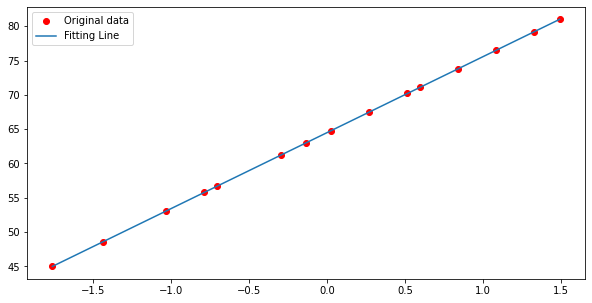

In [37]:
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

num_epochs = 1000
for epoch in range(num_epochs):
    optimizer.zero_grad()
    # forward
    out = model(heights)
    loss = criterion(out, weights)
    # backward
    loss.backward()
    optimizer.step()

    print(f'Epoch[{epoch+1}/{num_epochs}], loss: {loss.item():.6f}', end=' ')
    for name, param in model.named_parameters():
        print (name, param.data.numpy(), end=' ')
    print()
model.eval()
with torch.no_grad():
    predict = model(heights)
predict = predict.data.numpy()

fig = plt.figure(figsize=(10, 5))
plt.plot(heights.numpy(), weights.numpy(), 'ro', label='Original data')
plt.plot(heights.numpy(), predict, label='Fitting Line')
plt.legend() 
plt.show()

## Evaluate the model

In [38]:
h = torch.tensor([[190]], dtype=torch.float32)
model.eval()
w = model(h)
print(w)
#model.train()


tensor([[2168.4272]], grad_fn=<AddmmBackward0>)


### Manual Computation

https://pytorch.org/docs/stable/generated/torch.nn.BatchNorm1d.html

In [39]:
h_norm = (h-torch.mean(heights))/torch.sqrt(torch.var(heights)) * model.norm.weight + model.norm.bias
w = h_norm * model.linear.weight.data + model.linear.bias.data
print(w)

AttributeError: 'Linear' object has no attribute 'norm'